## Note: All plots should meet the basic requirements of scientific plotting. For example, having title, x-axis, y-axis, legend... Interpretation of plots can get full points as long as they make sense.

## Q0: import the dataset to a pandas dataframe


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
import numpy as np
from statsmodels.graphics.gofplots import qqplot_2samples

import math

imdb_path = "/Users/Andy/Desktop/imdb_dataset/movie_metadata.csv"


df_im = pd.read_csv(imdb_path)
df_im = df_im.dropna()


## Q1. (1%) Historgam.
### Plot the histogram of movie durations. Note: plot only movies with a duration of less than or equal to 240 minutes. Use a bin size of 30.

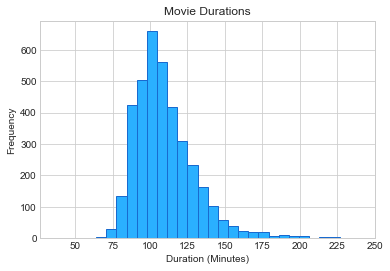

Almost all movies included in this data are in between 80 and 120 minutes long. The rightward skew points towards longer movies


In [2]:
df_shortfilms_large = df_im[df_im["duration"] <= 240]

df_shortfilms = df_shortfilms_large["duration"]

shortfilms = df_shortfilms.tolist()

plt.style.use('seaborn-whitegrid')
plt.hist(shortfilms, bins=30,facecolor="#2ab0ff" ,edgecolor='#196acf')

plt.title("Movie Durations")

plt.xlabel('Duration (Minutes)')
plt.ylabel("Frequency")

plt.show()


print("Almost all movies included in this data are in between 80 and 120 minutes long. The rightward skew points towards longer movies")


## Q2. (1.2%) Side-by-side box plot.
### Generate a side-by-side box plot to show the distribution of the number of critic reviews on four rating categories: PG-13, PG, G, and R. What insights can you get from the plot?

In [3]:
##TODO


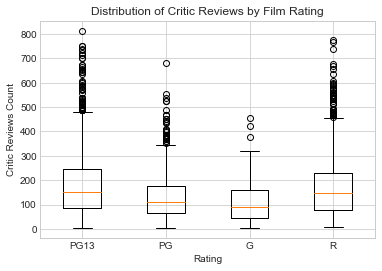

Insights:	 G rated movies seem to have the smallest number of outliers. None of the boxes have lower bound outliers, only upper bound. 
 All medians lie roughly between 100 and 150 critic reviews. No 'maximum' goes above 500 reviews 
 From these findings, and prior knowledge this reinforces the idea that less G rated films are produced than other films.


In [12]:
df_Grated = df_im[df_im["content_rating"] == "G"]
df_PGrated = df_im[df_im["content_rating"] == "PG"]
df_pg13rated = df_im[df_im["content_rating"] == "PG-13"]
df_Rrated = df_im[df_im["content_rating"] == "R"]

df_gCritics = df_Grated["num_critic_for_reviews"]
df_pgCritics = df_PGrated["num_critic_for_reviews"]
df_pg13Critics = df_pg13rated["num_critic_for_reviews"]
df_rCritics = df_Rrated["num_critic_for_reviews"]

ratingData = {} #hashmap to hold all box plots


pg13Critics = df_pg13Critics.tolist()
ratingData["PG13"]=pg13Critics

pgCritics  = df_pgCritics.tolist()
ratingData["PG"]=pgCritics



gCritics = df_gCritics.tolist()
ratingData["G"]=gCritics



rCritics = df_rCritics.tolist()
ratingData["R"]=rCritics

fig,ax = plt.subplots()

ax.boxplot(ratingData.values())
ax.set_xticklabels(ratingData.keys())


plt.xlabel('Rating')
plt.ylabel("Critic Reviews Count")
plt.title("Distribution of Critic Reviews by Film Rating")

plt.show()



##TODO change to boxplots
insights = "G rated movies seem to have the smallest number of outliers. None of the boxes have lower bound outliers, only upper bound. \n All medians lie roughly between 100 and 150 critic reviews. No 'maximum' goes above 500 reviews \n From these findings, and prior knowledge this reinforces the idea that less G rated films are produced than other films."
print('Insights:\t', insights)

## Q3. (1.2%) QQ plot.
### We want to specifically compare the distribution of the number of critic reviews on two rating categories: R and PG-13. Generate a QQ plot and make comparisons on the two distributions from the plot. What insights can you get from the plot?

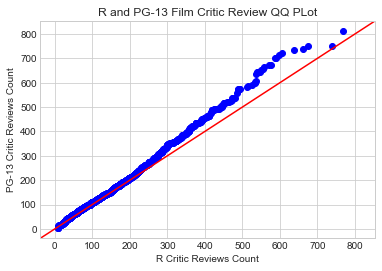

In [5]:
#pp_r = sm.ProbPlot(rCritics)
#pp_13 = sm.ProbPlot(pg13Critics)


qqplot_2samples(np.array(rCritics),np.array(pg13Critics),line='45') #probably has relationship if followes 45 deg line




plt.title("R and PG-13 Film Critic Review QQ PLot")
plt.ylabel("PG-13 Critic Reviews Count")
plt.xlabel("R Critic Reviews Count")



plt.show()
##TODO



In [13]:
##TODO
insights = 'For the first half of the graph, the distributions match well, suggesting that the two axes have a relationship as they \n follow the 45 degree line. Towards the end, we do see a left skew towards pg-13 films though. \n This may suggest that for films that are more popular, such that they recieve more critic attention, a PG-13 films will likely recieve a little more critic attention.'
print('Insights:\t', insights)

Insights:	 For the first half of the graph, the distributions match well, suggesting that the two axes have a relationship as they 
 follow the 45 degree line. Towards the end, we do see a left skew towards pg-13 films though. 
 This may suggest that for films that are more popular, such that they recieve more critic attention, a PG-13 films will likely recieve a little more critic attention.


## Q4. (1.2%) Scatter plot.
### Now we pay our attention to movies that are rated as 'G'.  Generate a scatter plot on the number of critic reviews and the number of user reviews. Use colors to show the IMDb scores. What insights can you get from the plot?


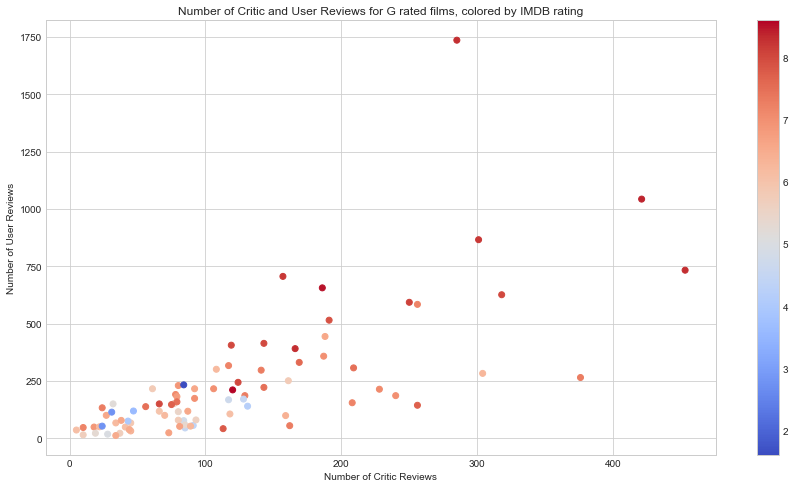

In [7]:
gCritics


df_gUser = df_Grated["num_user_for_reviews"]
gUsers = df_gUser.tolist()

plt.figure(figsize=(15,8))

plt.scatter(gCritics,gUsers,marker = 'o',c=[i for i in df_im[df_im['content_rating']=='G']['imdb_score']], cmap='coolwarm')
plt.xlabel("Number of Critic Reviews")
plt.ylabel("Number of User Reviews")
plt.title("Number of Critic and User Reviews for G rated films, colored by IMDB rating")


plt.colorbar()
##TODO

In [14]:
##TODO 
insights = 'G rated films with an IMDB score lower than 5 are less likely to recieve reviews from users or critics \n On the other hand, just because a G rated movie has a high IMDB score, does not mean it will recieve many reviews from users or critics'
print('Insights:\t', insights)

Insights:	 G rated films with an IMDB score lower than 5 are less likely to recieve reviews from users or critics 
 On the other hand, just because a G rated movie has a high IMDB score, does not mean it will recieve many reviews from users or critics


## Q5. (1.4%) Star plot.
### We want to compare the number of Facebook likes for the following eight countries: Australia, Canada, France, Germany, India, Spain, UK, and USA. 
### Specifically, we want to draw three curves, each representing one of the following values for all countries: mean of movie_facebook_likes,mean of actor_1_facebook_likes, mean of director_facebook_likes
### Generate a star plot that shows the above information. Each of the equiangular spokes should represent one country.

Hint1: Read https://www.kite.com/python/examples/5561/matplotlib-plot-a-polar-plot 

Hint2: the theta value is in the radian unit, so you might find https://docs.python.org/3/library/math.html#math.radians  useful.

/Library/Python/3.7/site-packages/ipykernel_launcher.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator


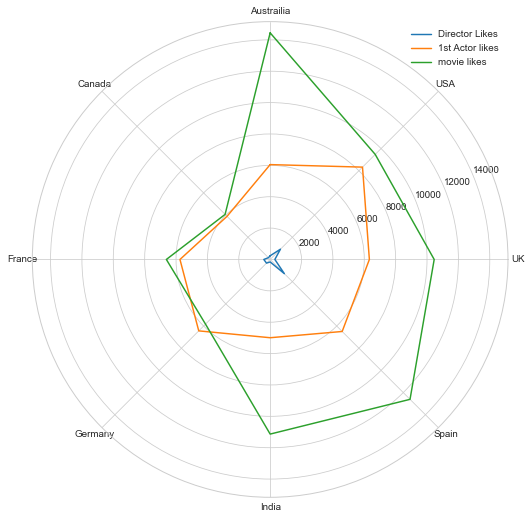

<Figure size 432x288 with 0 Axes>

In [19]:
##TODO
def facebookGrabber(nationdf, cat):
    movieLikes = nationdf["movie_facebook_likes"].mean()
    actorLikes = nationdf["actor_1_facebook_likes"].mean()
    directorLikes = nationdf["director_facebook_likes"].mean()
    if cat == "movie_facebook_likes":
        return movieLikes
    elif cat == "actor_1_facebook_likes":
        return actorLikes
    else:
        return directorLikes



#country dfs
nations=[]
df_ausFilms = df_im[df_im["country"] == "Australia"]
nations.append(df_ausFilms)

df_usaFilms = df_im[df_im["country"] == "USA"]
nations.append(df_usaFilms)

df_ukFilms = df_im[df_im["country"] == "UK"]
nations.append(df_ukFilms)

df_spFilms = df_im[df_im["country"] == "Spain"]
nations.append(df_spFilms)

df_indFilms = df_im[df_im["country"] == "India"]
nations.append(df_indFilms)


df_gerFilms = df_im[df_im["country"] == "Germany"]
nations.append(df_gerFilms)

df_frFilms = df_im[df_im["country"] == "France"]
nations.append(df_frFilms)

df_caFilms = df_im[df_im["country"] == "Canada"]
nations.append(df_caFilms)



##plotting
w = 9
h = 9
d = 70
plt.figure(figsize=(w, h), dpi=d)

angles = [90,45,0,315,270,225,180,135,90]
theta = []
for point in angles:
    theta.append(math.radians(point))



curve_movielikes = []
curve_actorlikes = []
curve_directorlikes = []
for state in nations:
    curve_movielikes.append(facebookGrabber(state,"movie_facebook_likes"))
    curve_actorlikes.append(facebookGrabber(state,"actor_1_facebook_likes"))
    curve_directorlikes.append(facebookGrabber(state,"director_facebook_likes"))

curve_movielikes.append(curve_movielikes[0])
curve_actorlikes.append(curve_actorlikes[0])
curve_directorlikes.append(curve_directorlikes[0])


ax = plt.subplot(111, projection='polar')
ax.set_xticklabels(["UK","USA","Austrailia","Canada","France","Germany","India","Spain"])
ax.plot(theta, curve_directorlikes, label='Director Likes')
ax.plot(theta, curve_actorlikes, label='1st Actor likes')
ax.plot(theta, curve_movielikes, label='movie likes')

ax.legend()
plt.show()
plt.savefig("out.png")



In [20]:
##TODO 
insights = 'Canadian films recieve a small number of FB likes in any catagory. Australia has many movie likes, much more than any country \n Spain has much more director likes than any country. The USA has much more 1st actor likes than any country. \n Overall, people give many more likes to movies as opposed to actors. Few people seek to give likes to the director. '
print('Insights:\t', insights)

Insights:	 Canadian films recieve a small number of FB likes in any catagory. Australia has many movie likes, much more than any country 
 Spain has much more director likes than any country. The USA has much more 1st actor likes than any country. 
 Overall, people give many more likes to movies as opposed to actors. Few people seek to give likes to the director. 
